In [1]:
import numpy as np
import pandas as pd
import matplotlib as mp
import statsmodels.api as sm

from statsmodels.sandbox.regression.gmm import IV2SLS 
# There is a package named IV2SLS in Python. Do not use this package! The exogenous explanatory variables must
# be entered as instruments. So it gives wrong answers
from statsmodels.sandbox.regression.gmm import GMM

In [7]:
import seaborn as sns

In [8]:
input_table = pd.read_csv('small_retailers_stock_performance.csv')
input_table.head()

,Constant,Stock Change,Inventory Turnover,Operating Profit,Interaction Effect,Current Ratio,Quick Ratio,Debt Asset Ratio
0,1,0.870332,1.795946,0.115846,0.208053,1.672527,0.255171,0.473317
1,1,-0.047347,1.395501,0.436967,0.609788,1.637261,0.221763,0.489967
2,1,0.001176,1.664563,0.541016,0.900555,1.640619,0.189141,0.374269
3,1,-0.901200,1.605738,0.539399,0.866133,1.436221,0.131944,0.224399
4,1,-0.176353,1.591451,0.539938,0.859285,1.433140,0.183095,0.213446


<Axes: >

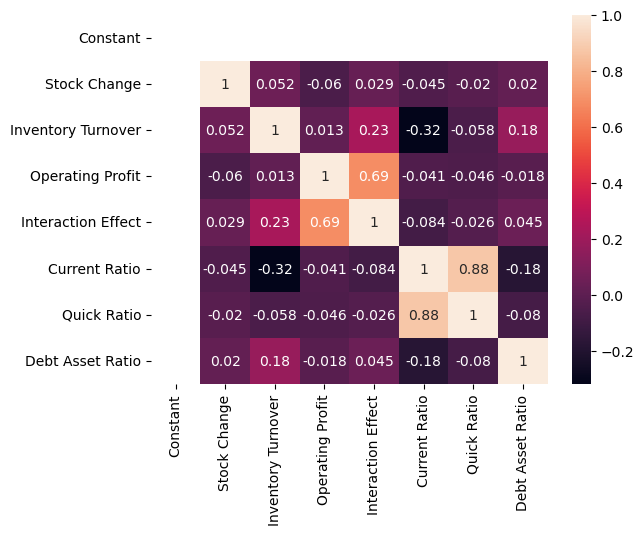

In [10]:
# input_table
a = input_table.corr(method = "pearson")
sns.heatmap(a, annot= True)

# High correlation between quick-current ratio, operating profit and interaction effect;
# inventory turnover and interaction effect

In [17]:
model_2sls = sm.OLS(input_table["Stock Change"], input_table[["Constant",
                                                              "Operating Profit","Interaction Effect",\
                                                                  "Current Ratio", "Debt Asset Ratio"
                                                             ]]).fit()

In [18]:
# Get OLS for inventory turnover, remove Current Ratio from Model IV
# endog_predict

model_iv = sm.OLS(input_table["Inventory Turnover"],input_table[["Constant","Quick Ratio"]]).fit()
endog_predict = model_iv.predict(input_table[["Constant","Quick Ratio"]])
input_table["Endogenous Param"] = endog_predict

model_2sls = sm.OLS(input_table["Stock Change"], input_table[["Constant","Endogenous Param",\
                                                              "Operating Profit","Interaction Effect",\
                                                             ]]).fit()
model_2sls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Stock Change   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     7.722
Date:                Mon, 07 Oct 2024   Prob (F-statistic):           4.01e-05
Time:                        16:35:49   Log-Likelihood:                -1187.7
No. Observations:                1696   AIC:                             2383.
Df Residuals:                    1692   BIC:                             2405.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Constant              -0.1227      0.136     -0.901      0.368      -0.390       0.144
Endogenous Param       0.0054      0.006      0.973      0.331      -0.005       0.016
Operating Profit      -0.1271      0.028     -4.596      0.000      -0.181      -0.073
Interaction Effect     0.0015      0.000      4.003      0.000       0.001       0.002
==============================================================================
Omnibus:                      368.953   Durbin-Watson:                   2.241
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3448.497
Skew:                           0.741   Prob(JB):                         0.00
Kurtosis:                       9.826   Cond. No.                         498.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# Remove Quick Ratio
model_2sls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Stock Change   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     6.275
Date:                Mon, 07 Oct 2024   Prob (F-statistic):           5.20e-05
Time:                        16:33:31   Log-Likelihood:                -1186.8
No. Observations:                1696   AIC:                             2384.
Df Residuals:                    1691   BIC:                             2411.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Constant               0.0336      0.023      1.490      0.136      -0.011       0.078
Operating Profit      -0.1246      0.028     -4.502      0.000      -0.179      -0.070
Interaction Effect     0.0015      0.000      3.836      0.000       0.001       0.002
Current Ratio         -0.0130      0.008     -1.624      0.104      -0.029       0.003
Debt Asset Ratio       0.0082      0.044      0.187      0.852      -0.078       0.094
==============================================================================
Omnibus:                      368.490   Durbin-Watson:                   2.243
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3434.719
Skew:                           0.741   Prob(JB):                         0.00
Kurtosis:                       9.812   Cond. No.                         165.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
model_iv = sm.OLS(input_table["Inventory Turnover"],input_table[["Constant","Current Ratio","Quick Ratio",\
                                                                 "Debt Asset Ratio"]]).fit()

# Fit the model, and get X-bar, from model_iv
endog_predict = model_iv.predict(input_table[["Constant","Current Ratio","Quick Ratio","Debt Asset Ratio"]])
input_table["Endogenous Param"] = endog_predict

In [ ]:
# Will return X_bar value
# add as a column 

In [16]:
# # Fit the model, and get X-bar, from model_iv
# endog_predict = model_iv.predict(input_table[["Constant","Current Ratio","Debt Asset Ratio"]])
# input_table["Endogenous Param"] = endog_predict

ValueError: shapes (1696,3) and (4,) not aligned: 3 (dim 1) != 4 (dim 0)

In [5]:
model_2sls = sm.OLS(input_table["Stock Change"], input_table[["Constant","Endogenous Param",\
                                                              "Operating Profit","Interaction Effect",\
                                                             ]]).fit()
model_2sls.summary()

# Interaction effect = operating effect times inventory turnover
# Positive = they move in the same direction, operating exceeds a threshold, increasing it would help increase stock 
# Inventory Turnover < threshold, result in a decrease in stock

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Stock Change   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     8.530
Date:                Mon, 07 Oct 2024   Prob (F-statistic):           1.27e-05
Time:                        16:00:46   Log-Likelihood:                -1186.5
No. Observations:                1696   AIC:                             2381.
Df Residuals:                    1692   BIC:                             2403.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Constant              -0.0176      0.020     -0.896      0.370      -0.056       0.021
Endogenous Param       0.0011      0.001      1.827      0.068   -7.76e-05       0.002
Operating Profit      -0.1201      0.028     -4.319      0.000      -0.175      -0.066
Interaction Effect     0.0014      0.000      3.621      0.000       0.001       0.002
==============================================================================
Omnibus:                      368.832   Durbin-Watson:                   2.243
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3433.920
Skew:                           0.742   Prob(JB):                         0.00
Kurtosis:                       9.811   Cond. No.                         109.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
y_vals  = np.array(input_table["Stock Change"])
x_vals  = np.array(input_table[["Inventory Turnover","Operating Profit","Interaction Effect"]])
iv_vals = np.array(input_table[["Current Ratio","Quick Ratio","Debt Asset Ratio"]])

class gmm(GMM):
    def momcond(self, params):
        p0, p1, p2, p3 = params
        endog = self.endog
        exog = self.exog
        inst = self.instrument   

        error0 = endog - p0 - p1 * exog[:,0] - p2 * exog[:,1] - p3 * exog[:,2]
        
        # Not a moment condition - do not multiply, as it's endogenous  
        error1 = (endog - p0 - p1 * exog[:,0] - p2 * exog[:,1] - p3 * exog[:,2]) * exog[:,1] # Times operating profit
        error2 = (endog - p0 - p1 * exog[:,0] - p2 * exog[:,1] - p3 * exog[:,2]) * exog[:,2] # Times Interactio Error
        error3 = (endog - p0 - p1 * exog[:,0] - p2 * exog[:,1] - p3 * exog[:,2]) * inst[:,0] # Times instrument
        error4 = (endog - p0 - p1 * exog[:,0] - p2 * exog[:,1] - p3 * exog[:,2]) * inst[:,1] 
        error5 = (endog - p0 - p1 * exog[:,0] - p2 * exog[:,1] - p3 * exog[:,2]) * inst[:,2] 

        # 
        g = np.column_stack((error0, error1, error2, error3, error4, error5))
        return g


# 6 moments
# 
beta0 = np.array([0.1, 0.1, 0.1, 0.1])
res = gmm(endog = y_vals, exog = x_vals, instrument = iv_vals, k_moms=6, k_params=4).fit(beta0)

res.summary()


Optimization terminated successfully.
         Current function value: 0.000046
         Iterations: 8
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.000373
         Iterations: 7
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.000372
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000372
         Iterations: 5
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.000372
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 gmm Results                                  
==============================================================================
Dep. Variable:                      y   Hansen J:                       0.6317
Model:                            gmm   Prob (Hansen J):                 0.729
Method:                           GMM                                         
Date:                Mon, 07 Oct 2024                                         
Time:                        16:48:43                                         
No. Observations:                1696                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p 0           -0.0200      0.021     -0.964      0.335      -0.061       0.021
p 1            0.0011      0.001      1.843      0.065   -6.89e-05       0.002
p 2           -0.1071      0.032     -3.370      0.001      -0.169      -0.045
p 3            0.0011      0.000      2.760      0.006       0.000       0.002
==============================================================================
"""

In [20]:
# Drop Quick Ratio from expressions here:
# Drop from declaration, then adjust the 

y_vals  = np.array(input_table["Stock Change"])
x_vals  = np.array(input_table[["Inventory Turnover","Operating Profit","Interaction Effect"]])
# iv_vals = np.array(input_table[["Current Ratio","Quick Ratio","Debt Asset Ratio"]])
iv_Vals = np.array(input_table[["Current Ratio","Quick Ratio","Debt Asset Ratio"]])


# GMM - single model, we just want to estimate coeffients
class gmm(GMM):
    def momcond(self, params):
        p0, p1, p2, p3 = params
        endog = self.endog
        exog = self.exog
        inst = self.instrument   

        error0 = endog - p0 - p1 * exog[:,0] - p2 * exog[:,1] - p3 * exog[:,2]
        
        # Not a moment condition - do not multiply, as it's endogenous  
        error1 = (endog - p0 - p1 * exog[:,0] - p2 * exog[:,1] - p3 * exog[:,2]) * exog[:,1] # Times operating profit
        error2 = (endog - p0 - p1 * exog[:,0] - p2 * exog[:,1] - p3 * exog[:,2]) * exog[:,2] # Times Interactio Error
        error3 = (endog - p0 - p1 * exog[:,0] - p2 * exog[:,1] - p3 * exog[:,2]) * inst[:,0] # Times instrument
        # error4 = (endog - p0 - p1 * exog[:,0] - p2 * exog[:,1] - p3 * exog[:,2]) * inst[:,1] 
        error5 = (endog - p0 - p1 * exog[:,0] - p2 * exog[:,1] - p3 * exog[:,2]) * inst[:,2] 

        # 
        g = np.column_stack((error0, error1, error2, error3, error5))
        return g


# 6 moments
beta0 = np.array([0.1, 0.1, 0.1, 0.1])
res = gmm(endog = y_vals, exog = x_vals, instrument = iv_vals, k_moms=5, k_params=4).fit(beta0)

res.summary()


Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 8
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.000100
         Iterations: 7
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000100
         Iterations: 6
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000100
         Iterations: 2
         Function evaluations: 5
         Gradient evaluations: 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 gmm Results                                  
==============================================================================
Dep. Variable:                      y   Hansen J:                       0.1700
Model:                            gmm   Prob (Hansen J):                 0.680
Method:                           GMM                                         
Date:                Mon, 07 Oct 2024                                         
Time:                        17:02:06                                         
No. Observations:                1696                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p 0           -0.0337      0.029     -1.168      0.243      -0.090       0.023
p 1            0.0016      0.001      1.668      0.095      -0.000       0.003
p 2           -0.0990      0.034     -2.902      0.004      -0.166      -0.032
p 3            0.0010      0.000      1.948      0.051   -5.88e-06       0.002
==============================================================================
"""